In [8]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import cv2

In [14]:

digits = datasets.load_digits()
data = digits.data # actual data samples
target = digits.target # labels

print(len(data))


1797


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


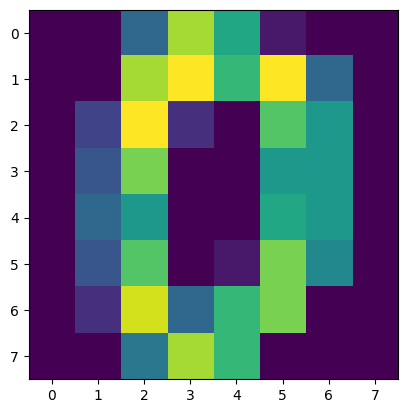

In [15]:
images = digits.images
print(images[0])
print(data[0])

plt.imshow(images[0])




In [18]:

# use grid search and cross validation to find good parameters
clf = sklearn.svm.SVC(gamma=0.001, C=100.)

train_size = int(len(data) * 9 / 10)

clf.fit(data[:train_size], target[:train_size])


,C,100.0
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:

total_count = { num : 0 for num in range(10) }
correct = { num : 0 for num in range(10) }

pred = clf.predict([data[1600]]).item()
print(pred, target[1600])

for i in range(1600, len(data)):
    pred = clf.predict([data[i]]).item()
    if target[i] > 9 or target[i] < 0:
        print("oops")
    total_count[target[i]] += 1
    
    if pred == target[i]:
        correct[target[i]] += 1



2 2


In [45]:

df= pd.DataFrame({
    'Correct': correct,
    'Total': total_count
})



display(df)


,Correct,Total
0,17,17
1,20,20
2,18,18
3,18,22
4,22,22
5,19,19
6,22,22
7,20,20
8,17,17
9,18,20


In [46]:
df.loc['Total'] = [sum(correct.values()), sum(total_count.values())]
print(df.index)
print(df.keys())
# loc is for locating by element, [row, column]. Supports array-valued inputs and slices
# iloc uses indexes to do the same thing
print(df.loc[0, 'Correct'])

df['% Correct'] = ["{:.2%}".format(df.loc[key, 'Correct'] / df.loc[key, 'Total']) for key in df.index]


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'Total'], dtype='object')
Index(['Correct', 'Total'], dtype='object')
17


In [47]:

display(df)

,Correct,Total,% Correct
0,17,17,100.00%
1,20,20,100.00%
2,18,18,100.00%
3,18,22,81.82%
4,22,22,100.00%
5,19,19,100.00%
6,22,22,100.00%
7,20,20,100.00%
8,17,17,100.00%
9,18,20,90.00%
